In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# reading the data from the file
df_titanic = pd.read_csv("titanic.csv")
# sorting the dataframe by Fare
df_titanic.sort_values(by=['Fare'], inplace=True)
# reseting the index of the dataframe based on sort
df_titanic.reset_index(drop=True, inplace=True)

# creating a column countSurvived grouped by Fare which represents the number of passengers survived
df11 = df_titanic.groupby('Fare')['Survived'].apply(lambda x: (x==1).sum()).reset_index(name='countSurvived')
# creating a column countDied grouped by Fare which represents the number of passengers died
df12 = df_titanic.groupby('Fare')['Survived'].apply(lambda x: (x==0).sum()).reset_index(name='countDied')
# creating a column totalCount grouped by Fare which represents the total number of passengers 
df13 = df_titanic.groupby('Fare')['Survived'].count().reset_index(name='totalCount')


df14 = df11.merge(df12, on='Fare', how='inner')

dfResult = df13.merge(df14, on='Fare', how='inner')
dfResult['Survival_Rate'] = dfResult['countSurvived']/dfResult['totalCount']
dfResult

,Fare,totalCount,countSurvived,countDied,Survival_Rate
0,0.0000,15,1,14,0.066667
1,4.0125,1,0,1,0.000000
2,5.0000,1,0,1,0.000000
3,6.2375,1,0,1,0.000000
4,6.4375,1,0,1,0.000000
...,...,...,...,...,...
243,227.5250,4,3,1,0.750000
244,247.5208,2,1,1,0.500000
245,262.3750,2,2,0,1.000000
246,263.0000,4,2,2,0.500000


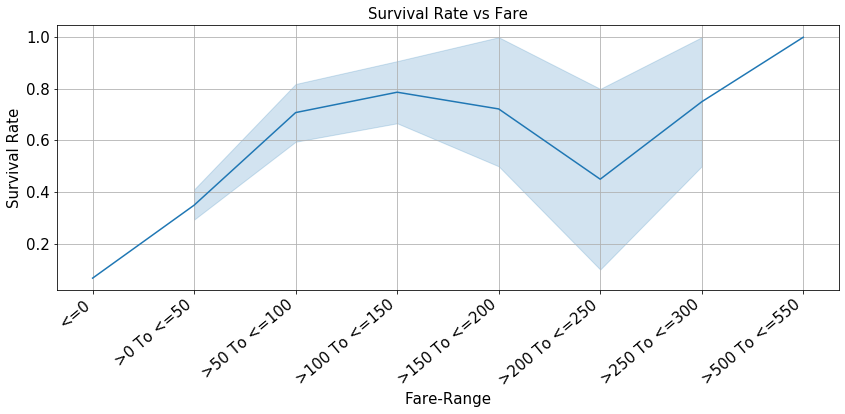

In [71]:
# creating ranges for the fare values
bins = [-1, 0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550]
names = ['<=0', '>0 To <=50', '>50 To <=100', '>100 To <=150', '>150 To <=200', '>200 To <=250', '>250 To <=300', '>300 To <=350', '>350 To <=400', '>400 To <=450', '>450 To <=500','>500 To <=550']

dfResult['Fare-Range'] = pd.cut(dfResult['Fare'], bins, labels=names)
dfResult['Fare-Range'] = dfResult['Fare-Range'].astype(str)

plt.figure(figsize=(12, 6))
# line plot with "Fare-Range" in x-axis and "Survival_Rate" in y-axis
ax=sns.lineplot(x="Fare-Range", y="Survival_Rate", data = dfResult, sort=False)

ax.set_xticklabels(dfResult['Fare-Range'].unique(), rotation=40, ha="right", fontsize=15)
# Setting font-size, label-size 
rc={'font.size': 15, 'axes.labelsize': 15, 'legend.fontsize': 15.0, 
    'axes.titlesize': 15, 'xtick.labelsize': 15, 'ytick.labelsize': 15}
plt.rcParams.update(**rc)
# Setting title
plt.title('Survival Rate vs Fare')
# Setting y-axis label
plt.ylabel('Survival Rate')
plt.tight_layout()
# Enabling grid lines
plt.gca().grid(True)

plt.show()

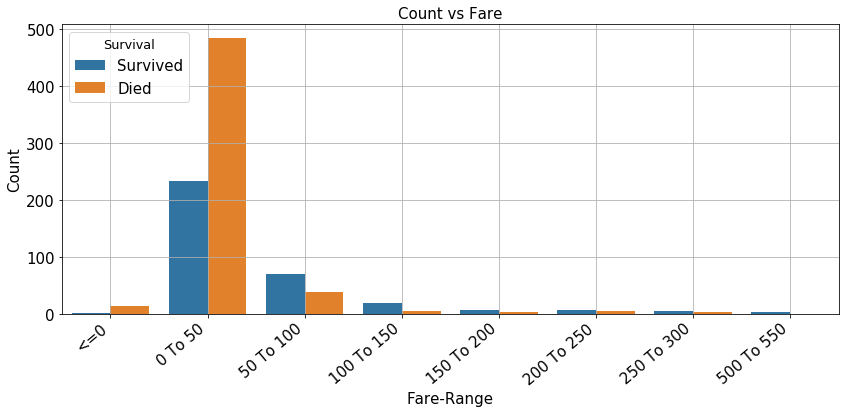

In [26]:
plt.figure(figsize=(12, 6))
dfCountPlt = df_titanic
bins = [-1, 0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550]
names = ['<=0', '0 To 50', '50 To 100', '100 To 150', '150 To 200', '200 To 250', '250 To 300', '300 To 350', '350 To 400', '400 To 450', '450 To 500','500 To 550']

dfCountPlt['Fare-Range'] = pd.cut(dfCountPlt['Fare'], bins, labels=names)
dfCountPlt['Fare-Range'] = dfCountPlt['Fare-Range'].astype(str)

dfCountPlt['Survival'] = dfCountPlt.Survived.map({0:'Died', 1:'Survived'})

ax1 = sns.countplot(x = dfCountPlt['Fare-Range'], hue=dfCountPlt['Survival'], data = dfCountPlt)
ax1.set_xticklabels(dfCountPlt['Fare-Range'].unique(), rotation=40, ha="right", fontsize=15)
rc1={'font.size': 15, 'axes.labelsize': 15, 'legend.fontsize': 15.0, 
    'axes.titlesize': 15, 'xtick.labelsize': 15, 'ytick.labelsize': 15}
plt.rcParams.update(**rc1)
plt.title('Count vs Fare')
# Set x-axis label
plt.ylabel('Count')
plt.tight_layout()
plt.gca().grid(True)

plt.show()


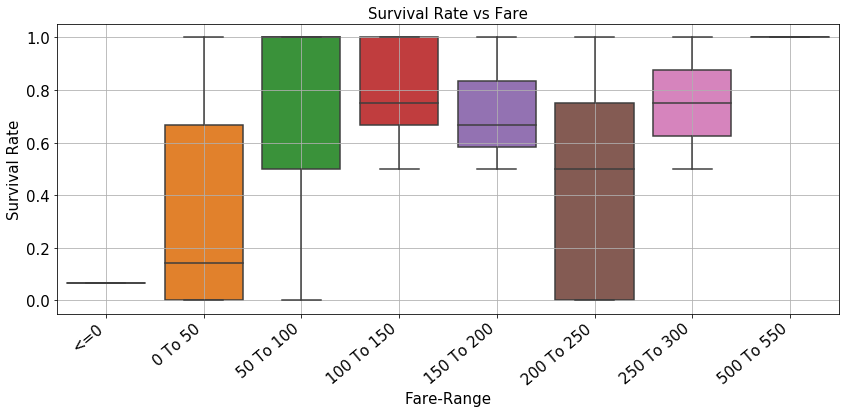

In [31]:
plt.figure(figsize=(12, 6))
ax2 = sns.boxplot(x = dfResult['Fare-Range'], y=dfResult['Survival_Rate'],  data = dfResult)
ax2.set_xticklabels(dfResult['Fare-Range'].unique(), rotation=40, ha="right", fontsize=15)
rc1={'font.size': 15, 'axes.labelsize': 15, 'legend.fontsize': 15.0, 
    'axes.titlesize': 15, 'xtick.labelsize': 15, 'ytick.labelsize': 15}
plt.rcParams.update(**rc1)
plt.title('Survival Rate vs Fare')
# Set x-axis label
plt.ylabel('Survival Rate')
plt.tight_layout()
plt.gca().grid(True)

plt.show()

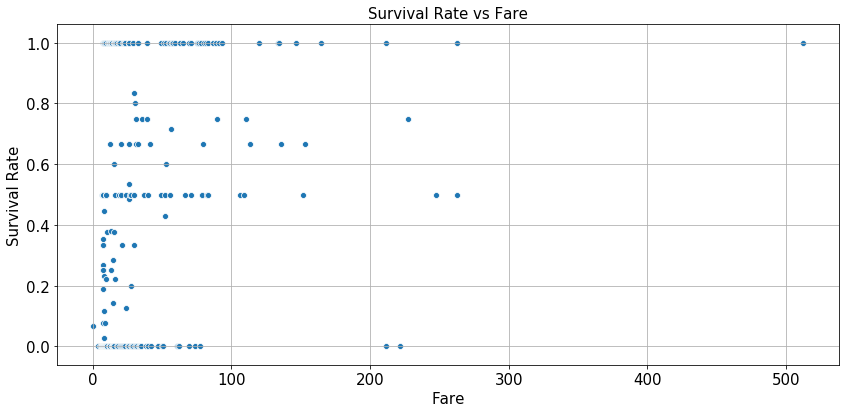

In [34]:
plt.figure(figsize=(12, 6))
ax3 = sns.scatterplot(x = dfResult['Fare'], y=dfResult['Survival_Rate'],  data = dfResult)

rc1={'font.size': 15, 'axes.labelsize': 15, 'legend.fontsize': 15.0, 
    'axes.titlesize': 15, 'xtick.labelsize': 15, 'ytick.labelsize': 15}
plt.rcParams.update(**rc1)
plt.title('Survival Rate vs Fare')
# Set x-axis label
plt.ylabel('Survival Rate')
plt.tight_layout()
plt.gca().grid(True)

plt.show()

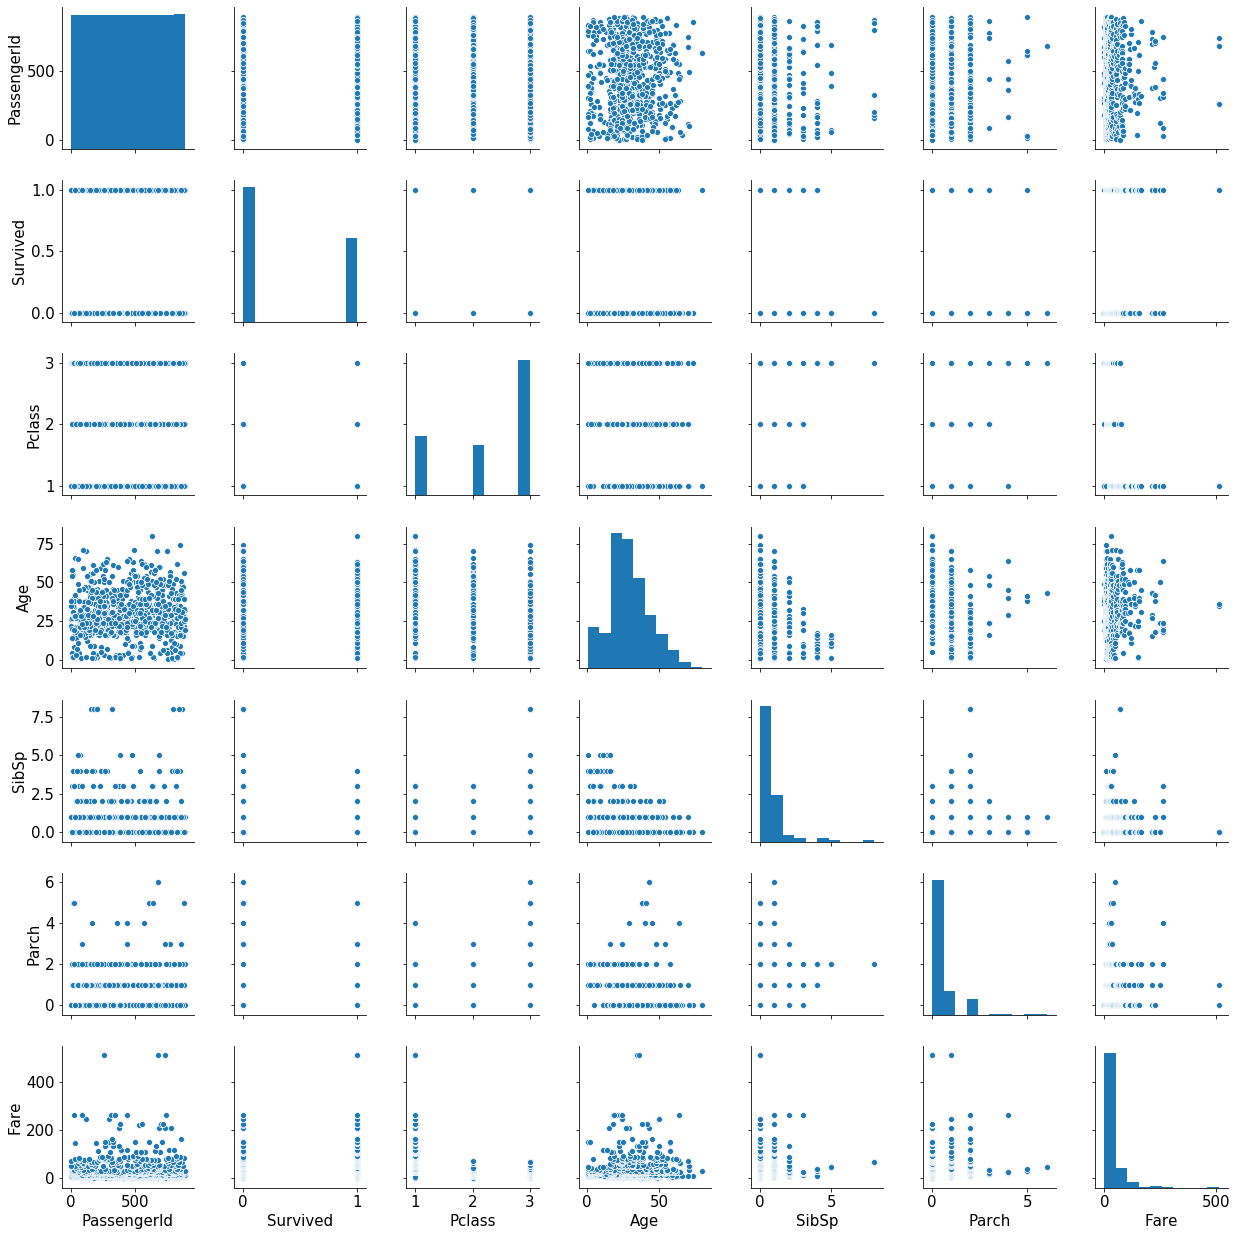

In [37]:
sns.pairplot(dfCountPlt)

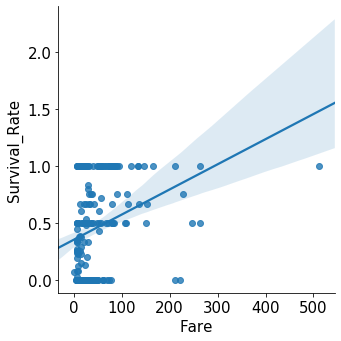

In [41]:
sns.lmplot(x="Fare", y = "Survival_Rate", data = dfResult)

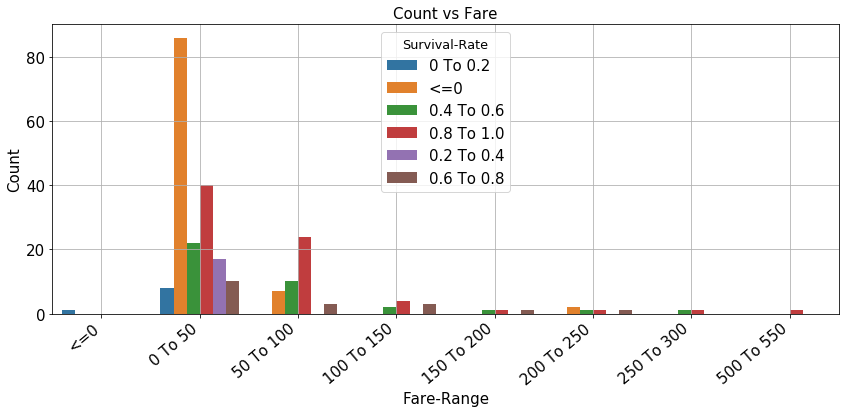

In [55]:
plt.figure(figsize=(12, 6))
dfDiff = dfResult
dfDiff.sort_values(by=['Fare'], inplace=True)


dfDiff.reset_index(drop=True, inplace=True)

bins = [-1, 0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550]
names = ['<=0', '0 To 50', '50 To 100', '100 To 150', '150 To 200', '200 To 250', '250 To 300', '300 To 350', '350 To 400', '400 To 450', '450 To 500','500 To 550']

dfDiff['Fare-Range'] = pd.cut(dfDiff['Fare'], bins, labels=names)
dfDiff['Fare-Range'] = dfDiff['Fare-Range'].astype(str)

bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2]
names = ['<=0', '0 To 0.2',  '0.2 To 0.4', '0.4 To 0.6',  '0.6 To 0.8',  '0.8 To 1.0', '1.0 To 1.2']

dfDiff['Survival-Rate'] = pd.cut(dfDiff['Survival_Rate'], bins, labels=names)
dfDiff['Survival-Rate'] = dfDiff['Survival-Rate'].astype(str)

ax1 = sns.countplot(x = dfDiff['Fare-Range'], hue=dfDiff['Survival-Rate'], data = dfDiff)

ax1.set_xticklabels(dfDiff['Fare-Range'].unique(), rotation=40, ha="right", fontsize=15)

rc1={'font.size': 15, 'axes.labelsize': 15, 'legend.fontsize': 15.0, 
    'axes.titlesize': 15, 'xtick.labelsize': 15, 'ytick.labelsize': 15}
plt.rcParams.update(**rc1)
plt.title('Count vs Fare')
# Set x-axis label
plt.ylabel('Count')
plt.tight_layout()
plt.gca().grid(True)

plt.show()

In [59]:
dfClass = df_titanic

dfClass['Survival'] = dfClass.Survived.map({0:'Died', 1:'Survived'})
dfClass['Survival'] = dfClass.Survived.map({0:'Died', 1:'Survived'})

dfClass['Class'] = dfClass.Pclass.map({1:'Upper Class',2:'Middle Class',3:'Lower Class'})

dfClass


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare-Range,Survival,Class
0,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S,<=0,Survived,Lower Class
1,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S,<=0,Died,Lower Class
2,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S,<=0,Died,Lower Class
3,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S,<=0,Died,Upper Class
4,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S,<=0,Died,Middle Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,250 To 300,Died,Upper Class
887,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,250 To 300,Survived,Upper Class
888,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,500 To 550,Survived,Upper Class
889,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,500 To 550,Survived,Upper Class


<Figure size 864x432 with 0 Axes>

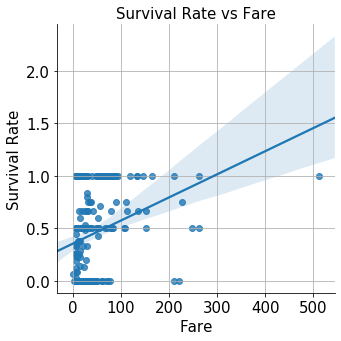

In [68]:


plt.figure(figsize=(12, 6))
ax=sns.lmplot(x="Fare", y="Survival_Rate", data = dfResult)

#ax.set_xticklabels(dfResult['Fare'].unique(), rotation=40, ha="right", fontsize=15)

rc={'font.size': 15, 'axes.labelsize': 15, 'legend.fontsize': 15.0, 
    'axes.titlesize': 15, 'xtick.labelsize': 15, 'ytick.labelsize': 15}
plt.rcParams.update(**rc)
plt.title('Survival Rate vs Fare')
# Set x-axis label
plt.ylabel('Survival Rate')
plt.tight_layout()
plt.gca().grid(True)

plt.show()